# 第2章 预备知识

## 2.1 数据操作

### 练习2.1.1

运行本节中的代码。将本节中的条件语句`X == Y`更改为`X < Y`或`X > Y`，然后看看你可以得到什么样的张量。

**解答：** 。 执行X < Y（X > Y）后返回和 X 大小相同的张量，对于每个位置，如果X当前位置元素小于（大于）Y当前位置元素，则新张量中相应项的值为True， 反之为False.

In [7]:
import pandas as pd
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import multinomial
from d2l import torch as d2l
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X<Y,X>Y

(tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

### 练习2.1.2

用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

**解答：** 相同。 在执行两个张量按元素操作时，我们会扩展两个张量使他们大小一致。从而，我们得到张量的各个轴的大小将取两个张量中各个轴大小的最大值。

In [137]:
#二维情况
print('二维情况')
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a, b, a+b)
print('三维情况')
#三维情况
a = torch.arange(3).reshape((3, 1,1))
b = torch.arange(6).reshape((1, 2,3))
a, b, a+b

二维情况
tensor([[0],
        [1],
        [2]]) tensor([[0, 1]]) tensor([[0, 1],
        [1, 2],
        [2, 3]])
三维情况


(tensor([[[0]],
 
         [[1]],
 
         [[2]]]),
 tensor([[[0, 1, 2],
          [3, 4, 5]]]),
 tensor([[[0, 1, 2],
          [3, 4, 5]],
 
         [[1, 2, 3],
          [4, 5, 6]],
 
         [[2, 3, 4],
          [5, 6, 7]]]))

## 2.2 数据预处理

创建包含更多行和列的原始数据集。

### 练习2.2.1

删除缺失值最多的列。

**解答：** 使用 data.drop(data.isna().sum().idxmax(), axis=1)

In [55]:
# import pandas as pd
# import torch
# import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('id,MSSubClass,MSZoning,LotFrontage,NumRooms,Alley,Price\n')  # 列名
    f.write('1,60,RL,65,NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,70,NA,70,2,NA,106000\n')
    f.write('3,NA,NA,80,4,NA,178100\n')
    f.write('4,NA,NA,90,NA,NA,140000\n')

    
data = pd.read_csv(data_file)
data = data.drop(data.isna().sum().idxmax(), axis=1)
data

,id,MSSubClass,LotFrontage,NumRooms,Alley,Price
0,1,60.0,65,NaN,Pave,127500
1,2,70.0,70,2.0,NaN,106000
2,3,NaN,80,4.0,NaN,178100
3,4,NaN,90,NaN,NaN,140000


### 练习2.2.2

将预处理后的数据集转换为张量格式。

**解答：** 用torch.tensor

In [62]:
# import pandas as pd
# import torch
# import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('id,MSSubClass,MSZoning,LotFrontage,NumRooms,Alley,Price\n')  # 列名
    f.write('1,60,RL,65,NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,70,NA,70,2,NA,106000\n')
    f.write('3,NA,NA,80,4,NA,178100\n')
    f.write('4,NA,NA,90,NA,NA,140000\n')

    
data = pd.read_csv(data_file)
data = data.drop(data.isna().sum().idxmax(), axis=1)
data = pd.get_dummies(data, dummy_na=True)
print(data)
data=torch.tensor(data.values)
data

   id  MSSubClass  LotFrontage  NumRooms   Price  Alley_Pave  Alley_nan
0   1        60.0           65       NaN  127500           1          0
1   2        70.0           70       2.0  106000           0          1
2   3         NaN           80       4.0  178100           0          1
3   4         NaN           90       NaN  140000           0          1


tensor([[1.0000e+00, 6.0000e+01, 6.5000e+01,        nan, 1.2750e+05, 1.0000e+00,
         0.0000e+00],
        [2.0000e+00, 7.0000e+01, 7.0000e+01, 2.0000e+00, 1.0600e+05, 0.0000e+00,
         1.0000e+00],
        [3.0000e+00,        nan, 8.0000e+01, 4.0000e+00, 1.7810e+05, 0.0000e+00,
         1.0000e+00],
        [4.0000e+00,        nan, 9.0000e+01,        nan, 1.4000e+05, 0.0000e+00,
         1.0000e+00]], dtype=torch.float64)

## 2.3 线性代数

### 练习2.3.1

证明一个矩阵$\mathbf{A}$的转置的转置是$\mathbf{A}$，即$(\mathbf{A}^\top)^\top = \mathbf{A}$。

**解答：** A = torch.arange(20).reshape(5, 4)  A.T.T==A

In [63]:
A = torch.arange(20).reshape(5, 4)
A.T.T==A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 练习2.3.2 

给出两个矩阵$\mathbf{A}$和$\mathbf{B}$，证明“它们转置的和”等于“它们和的转置”，即$\mathbf{A}^\top + \mathbf{B}^\top = (\mathbf{A} + \mathbf{B})^\top$。

**解答：** A = torch.rand(4,4)
        B=torch.rand(4,4)
        A.T+B.T==(A+B).T

In [68]:
A = torch.rand(4,4)
B=torch.rand(4,4)
A.T+B.T==(A+B).T

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 练习2.3.3

给定任意方阵$\mathbf{A}$，$\mathbf{A} + \mathbf{A}^\top$总是对称的吗？为什么？

**解答：**  因为 $(A+A^T)^T=A^T+A$  所以交换行列以后仍然不变

### 练习2.3.4

本节中定义了形状$(2,3,4)$的张量`X`。`len(X)`的输出结果是什么？

**解答：**  2

In [69]:
X = torch.arange(24).reshape(2, 3, 4)
len(X)

2

### 练习2.3.5 

对于任意形状的张量`X`,`len(X)`是否总是对应于`X`特定轴的长度?这个轴是什么?

**解答：** 对于轴0的长度

In [128]:
n=int(torch.rand(1)*10)+1
m=int(torch.rand(1)*10)+1
X=torch.rand(n,m)
torch.tensor([len(X),len(X)])==torch.tensor(X.shape)

tensor([ True, False])

### 练习2.3.6

运行`A/A.sum(axis=1)`，看看会发生什么。请分析一下原因？

**解答：** 会报错, A.sum(axis=1) 比A少一个轴 且 与A的1轴长度不一致无法广播 可以试着加上 keepdims=True以达到想要的结果。

In [159]:
A = torch.arange(20).reshape(5, 4) 
A/A.sum(axis=1)# 可以用 A/A.sum(axis=1,keepdims=True) 以达到想要的结果

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

### 练习2.3.7

考虑一个具有形状$(2,3,4)$的张量，在轴0、1、2上的求和输出是什么形状？

**解答：**  在哪个轴上求和哪个轴就消失 

In [167]:
A = torch.arange(24).reshape(2,3,4) 
print(f'轴0上的求和：{A.sum(axis=0).shape}，在轴1上的求和：{A.sum(axis=1).shape}，在轴2上的求和：{A.sum(axis=2).shape}')

轴0上的求和：torch.Size([3, 4])，在轴1上的求和：torch.Size([2, 4])，在轴2上的求和：torch.Size([2, 3])


### 练习2.3.8

为`linalg.norm`函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么？

**解答：** 在哪个轴上求和哪个轴就消失 

In [248]:
x = torch.randn(2, 3, 4)

# 计算不同维度上的范数
norm_dim0 = torch.linalg.norm(x, dim=0)
print(norm_dim0.shape)

norm_dim1 = torch.linalg.norm(x, dim=1)
print(norm_dim1.shape)

norm_dim2 = torch.linalg.norm(x, dim=2)
print(norm_dim2.shape)

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


## 2.4 微积分

### 练习2.4.1 

绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。

**解答：**

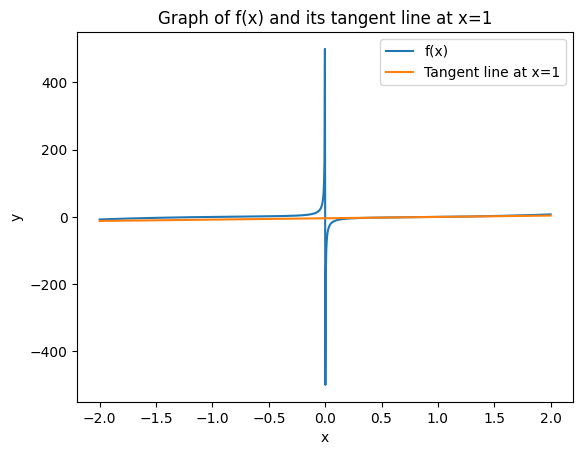

In [258]:
# import numpy as np
# import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x**3 - 1/x

# 定义导函数
def f_prime(x):
    return 3*x**2 + 1/x**2

# 生成x的值
x_vals = np.linspace(-2, 2, 1000)

# 计算函数值和切线值
y_vals = f(x_vals)
slope = f_prime(1)
intercept =f(1)

# 绘制函数图像和切线
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x)')
ax.plot(x_vals, slope*(x_vals-1)+intercept, label='Tangent line at x=1')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graph of f(x) and its tangent line at x=1')
plt.show()

### 练习2.4.2

求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

**解答：** $(6x_1,5e^{x_2})$

In [246]:
x = torch.arange(2.0,requires_grad=True)
print(torch.exp(x))
y = 3*x[0]**2+ 5*torch.exp(x[1])
print(y)
y.backward()
print(x.grad)
print(x.grad==torch.tensor([6*x[0],5*torch.exp(x[1])]))

tensor([1.0000, 2.7183], grad_fn=<ExpBackward0>)
tensor(13.5914, grad_fn=<AddBackward0>)
tensor([ 0.0000, 13.5914])
tensor([True, True])


### 练习2.4.3 

函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$ 的梯度是什么？

**解答：**  梯度为 $\frac{\mathbf{x}}{\sqrt{\sum_{i=1}^n x_i^2}}$

In [192]:
x = torch.arange(4.0,requires_grad=True)
print(x.grad)
y = torch.dot(x, x).sqrt()
print(y)
y.backward()
print(x.grad)
print(x.grad==x/(torch.dot(x, x).sqrt()))

None
tensor(3.7417, grad_fn=<SqrtBackward0>)
tensor([0.0000, 0.2673, 0.5345, 0.8018])
tensor([True, True, True, True])


### 练习2.4.4

尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

**解答：** $$\frac{\partial u}{\partial a}=\frac{\partial u}{\partial x} \frac{\partial x}{\partial a}+\frac{\partial u}{\partial y} \frac{\partial y}{\partial a}+\frac{\partial u}{\partial z} \frac{\partial z}{\partial a}$$
$$\frac{\partial u}{\partial b}=\frac{\partial u}{\partial x} \frac{\partial x}{\partial b}+\frac{\partial u}{\partial y} \frac{\partial y}{\partial b}+\frac{\partial u}{\partial z} \frac{\partial z}{\partial b}$$


## 2.5 自动微分

### 练习2.5.1 

为什么计算二阶导数比一阶导数的开销要更大？

**解答：** 在 PyTorch 中计算一阶导数和二阶导数都是通过自动微分机制实现的，但是计算二阶导数的开销通常要比计算一阶导数更大，原因如下：

1. 计算图的构建：在计算一阶导数时，PyTorch 只需要构建一次计算图，然后根据需要进行反向传播即可。而在计算二阶导数时，需要构建两次计算图，第一次是计算一阶导数，第二次是计算一阶导数的导数，也就是二阶导数。因此，计算二阶导数需要更多的计算图构建操作。
2. 内存占用：计算一阶导数时，PyTorch 只需要保留一阶导数的梯度值，而计算二阶导数时需要保留一阶导数和二阶导数的梯度值，这会占用更多的内存。
3. 计算量增加：计算二阶导数需要对一阶导数进行额外的计算，这增加了计算量和计算时间。

因此，计算二阶导数的开销通常要比计算一阶导数更大。


### 练习2.5.2 

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

**解答：** 会报错

In [197]:
x = torch.arange(4.0,requires_grad=True)
y = torch.dot(x, x).sqrt()
print(y)
y.backward()
print(x.grad)
y.backward()
print(x.grad)

tensor(3.7417, grad_fn=<SqrtBackward0>)
tensor([0.0000, 0.2673, 0.5345, 0.8018])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

### 练习2.5.3 

在控制流的例子中，我们计算`d`关于`a`的导数，如果将变量`a`更改为随机向量或矩阵，会发生什么？

**解答：** 会报错，pytorch只能对标量结果求梯度

In [207]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(1,3), requires_grad=True)
d = f(a)
print(a,d)
#d=d.sum()加个求和变成标量可以得到梯度 当然这可能不是我们要的结果
d.backward()

tensor([[-0.1927, -0.5498,  0.7219]], requires_grad=True) tensor([[ -39458.4219, -112601.4688,  147839.9844]], grad_fn=<MulBackward0>)


### 练习2.5.4 

重新设计一个求控制流梯度的例子，运行并分析结果。

**解答：** 

In [228]:
def f(a):
    b = a * 2
    while b.norm(1) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c.sum()
a = torch.randn(size=(3,1), requires_grad=True)
d = f(a)
print(a,d)

d.backward()

tensor([[-1.2542],
        [ 1.1392],
        [-0.4206]], requires_grad=True) tensor(-27423.0625, grad_fn=<SumBackward0>)


### 练习2.5.5

使$f(x)=\sin(x)$，绘制$f(x)$和$\frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=\cos(x)$。

**解答：**

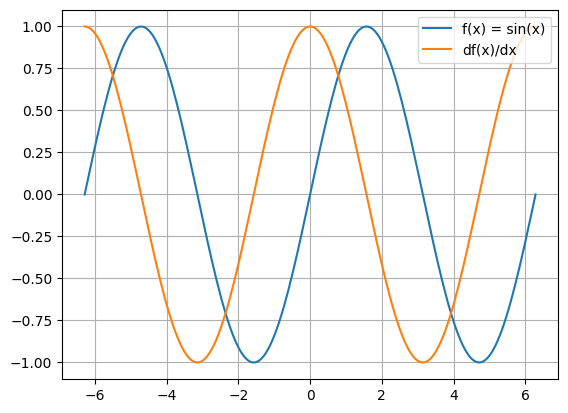

In [1]:
%matplotlib inline
# import torch
# import matplotlib.pyplot as plt
# import numpy as np
def f(x):
    return torch.sin(x)

def df(x):
    x.requires_grad_()
    y = f(x)
    y.backward(torch.ones_like(y))
    return x.grad

x = torch.linspace(-2*3.14159, 2*3.14159, 200)

y1 = f(x)
y2 = df(x)

plt.plot(x.detach().numpy(), y1.detach().numpy(), label='f(x) = sin(x)')
plt.plot(x.detach().numpy(), y2.detach().numpy(), label='df(x)/dx')
plt.grid()
plt.legend()
plt.show()


## 2.6 概率

### 练习2.6.1 

进行$m=500$组实验，每组抽取$n=10$个样本。改变$m$和$n$，观察和分析实验结果。

**解答：** 抽取的样本越少达到需要的进行实验的组

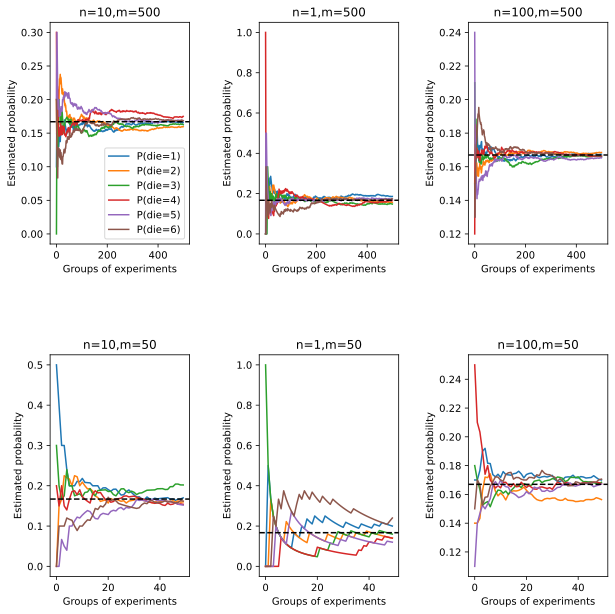

In [33]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
fair_probs = torch.ones([6]) / 6
def experiment(n=10,m=500,legend=1):
    counts = multinomial.Multinomial(n, fair_probs).sample((m,))
    cum_counts = counts.cumsum(dim=0)
    estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

    d2l.set_figsize((6, 4.5))
    for i in range(6):
        d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.title(f'n={n},m={m}')
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    if legend==1:
        d2l.plt.legend();
d2l.plt.figure(figsize=(10, 10)) 
d2l.plt.subplot(231)
experiment()
d2l.plt.subplot(232)
experiment(1,500,0)
d2l.plt.subplot(233)
experiment(100,500,0)

d2l.plt.subplot(234)
experiment(10,50,0)
d2l.plt.subplot(235)
experiment(1,50,0)
d2l.plt.subplot(236)
experiment(100,50,0)
d2l.plt.subplots_adjust(wspace =0.5, hspace =0.5)

### 练习2.6.2 

给定两个概率为$P(\mathcal{A})$和$P(\mathcal{B})$的事件，计算$P(\mathcal{A} \cup \mathcal{B})$和$P(\mathcal{A} \cap \mathcal{B})$的上限和下限。（提示：使用[友元图](https://en.wikipedia.org/wiki/Venn_diagram)来展示这些情况。)

**解答：**
$P(\mathcal{A} \cap \mathcal{B})$的上限是 $\min(P(\mathcal{A}), P(\mathcal{B}))$，因为两个事件的交集的概率的上限不能超过两个事件中概率较小的那个。


$P(\mathcal{A} \cap \mathcal{B})$的下限是 $0$，因为两个事件可以互斥。

$P(\mathcal{A} \cup \mathcal{B})=P(\mathcal{A})+P( \mathcal{B})-P(\mathcal{A} \cap \mathcal{B})$

所以考虑$P(\mathcal{A} \cap \mathcal{B})$的上下限可以很快得到
$P(\mathcal{A} \cup \mathcal{B})$ 的上限是 $1$，$P(\mathcal{A} \cup \mathcal{B})$ 的下限是 $\max(P(\mathcal{A}), P(\mathcal{B}))$。




### 练习2.6.3

假设我们有一系列随机变量，例如$A$、$B$和$C$，其中$B$只依赖于$A$，而$C$只依赖于$B$，能简化联合概率$P(A, B, C)$吗？（提示：这是一个[马尔可夫链](https://en.wikipedia.org/wiki/Markov_chain)。)

**解答：**
$P(A, B, C)= P(A|B,C) P(B,C)=P(A|B) P(B,C)=P(A|B) P(B|C)P(C)=P(A|B) P(C|B)P(B)$

### 练习2.6.4

在2.6.2节中，第一个测试更准确。为什么不运行第一个测试两次，而是同时运行第一个和第二个测试？

**解答：** 如果同时运行第一个测试两次且他们互不影响 
$$\begin{aligned}
&P(D_1 = 1, D_1 = 1 \mid H = 1)\\
=& ( P(D_1 = 1 \mid H = 1))^2\\
=&1\\
&P(D_1 = 1, D_1 = 1) \\
=& P(D_1 = 1, D_1 = 1, H = 0) + P(D_1 = 1, D_1 = 1, H = 1)  \\
=& P(D_1 = 1, D_1 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_1 = 1 \mid H = 1)P(H=1)\\
=& (P(D_1 = 1, \mid H = 0))^2P(H=0) +( P(D_1 = 1 \mid H = 1))^2P(H=1)\\
=& (0.01)^2*0.9985+1*0.0015.\\
=&0.00159985\\
&P( H = 1\mid,D_1 = 1, D_1 = 1) \\
=&\frac{P(D_1 = 1, D_1 = 1 \mid H = 1)P(H=1)}{P(D_1 = 1, D_1 = 1)}\\
=&\frac{1*0.0015}{0.00159985)}\\
=&0.9375878988655186\\
\end{aligned}
$$

高于同时运行第一个和第二个测试 ，但现实中我们不会让病人同种检验进行两次（采集不便或者不同保证同时测验结果的独立性），另外如果进行相继两次的第一种测试 得到都为阳性的结果患者得病的概率为$1-(1-0.1307)^2=0.24431751000000002$